# TP3 - The art of model programming : Le modèle SIR

Le modèle SIR (il serait plus juste de parler de la "famille de modèles SIR") est un modèle de simulation d'épidémies qui apparu au début du XX<sup>ème</sup> siècle. Nous allons aujourd'hui le programmer de deux manières pour comparer les deux méthodes. ATTENTION : les modèles et valeurs indiquées dans ce TP n'ont qu'un but pédagogique. Elles n'ont aucune valeur de vérité et toute ressemblance avec une situation réelle serait ... Bref ! Ne nous faites pas dire ce que nous n'aurons pas dit !


## 1. Le modèle SIR en très bref ...

Le modèle SIR a été développé au début du XX<sup>ème</sup> siècle afin de comprendre -- par la modélisation -- les dynamiques épidémiques. C'est un **modèle à compartiments**, c'est à dire que les éléments du modèles (ici les individus, mais dans d'autres modèles à compartiments ce pourrait être, par exemple, des molécules) sont répartis dans des compartiments et que le modèle va décrire la dynamique du système en explicitant les **transferts d'individus entre les compartiments du modèle** (sous-entendu, au sein d'un même compartiment, on suppose que les individus sont parfaitement interchangeables).

Dans le cas du modèle SIR, le modèle comporte trois compartiments : les individus sains (compartiment "S"), les individus infectés (compartiment "I") et les individus guéris (compartiment "R" pour Recovered). Les transferts entre compartiments sont assez simples : un individu infecté peut infecter un individu sain (qui devient alors infecté) et un individu infecté va, avec une certaine probabilité, guérir. Il ne retourne pas pour autant dans le compartiment S car les individus guéris sont désormais immunisés contre l'agent infectieux. La guérison transfert donc les individus vers le compartiment R (on utilise d'ailleurs parfois - en particulier en français - le terme "Resistant" pour nommer le compartiment R).


#### Pour en savoir plus :
http://images.math.cnrs.fr/Modelisation-d-une-epidemie-partie-1.html?lang=fr

### Le modèle SIRD

Le modèle SIR classique est composé de trois compartiments. Il comporte de très nombreuses variantes. Dans ce TP, après avoir étudié le modèle SIR, nous approfondierons en étudiant le modèle SIRD (Susceptible-Infectious-Recovered-Deceased) dans lequel les personnes infectées sont susceptibles de décéder. Ce modèle comportera donc quatre compartiments contrairement au SIR classique.



    

![image](https://gitlab.inria.fr/pbanse1/depot/-/raw/master/SIR.png)

## Organisation du TP:

Dans ce TP, nous allons réaliser différentes versions du modèle SIRD. Comme les versions ont beaucoup d'éléments en commun, il serait peu pratique de les inclure toutes dans le même fichier jupyter. Il vous est donc demandé à chaque fois de céer un nouveau jupyter notebook, de le nommer en suivant les recommandations du TP1 de manière à pouvoir vous retrouver. Vous pourrez ainsi faire de nouvelles versions de votre modèle en partant de la copie de modèle d'avant. Chaque fichier de nouvelle version doit commencer par un explication de ce que contient le fichier et finir par une analyse des résultats du modèle.

### Question 1.1 :

En vous basant sur le modèle de chemostat présenté dans la conférence introductive, écrivez les équations 
des réactions qui correspondent à un transfert d'individus d'un compartiment à un autre. Combien de variables et combien de paramètres comptera le modèle SIRD ?
    

Version enseignant :


                                                S+I →(contamination)→ I+I
                                                
                                                I →(guérison)→ R
                                                
                                                I →(décès)→ D
                                                
                                       

## 2.  Formalisme mathématique et schéma d'Euler explicite.

### Question 2.1 :

Toujours en vous inspirant de l'exemple de la conférence introductive, transformez les équations de réaction du modèle SIRD en équations différentielles. Pour bien montrer que cette transformation s'accompagne d'un passage du discret au continu on utilisera $\mathcal{S}$, $\mathcal{I}$, $\mathcal{R}$ et $\mathcal{D}$ les variables correspondant aux quatre compartiments (respectivement, S, I, R et D). On utilisera comme paramètres $r$ pour le taux de contamination, $g$ pour le taux de guérison et $p$ pour le taux de mortalité (si vous avez du mal à écrire les formules, n'hésitez pas à demander pour ne pas perdre de temps sur cette question).

$$\frac{d\mathcal{S}}{dt}= ...$$

$$\frac{d\mathcal{I}}{dt} = ...$$

$$\frac{d\mathcal{R}}{dt} = ...$$

$$\frac{d\mathcal{D}}{dt} = pI$$

Version enseignant:
$$
                                                \frac{dS}{dt}= -rSI
                                       $$$$         
                                                \frac{dI}{dt} = rSI-pI-gI
                                       $$$$         
                                                \frac{dR}{dt} = gI
$$$$         
                                                \frac{dD}{dt} = pI
$$

### Question 2.2 :

En discrétisant le temps, écrivez les équations qui lient $\mathcal{S}(t+\Delta t)$,$\mathcal{I}(t+\Delta t)$, $\mathcal{R}(t+\Delta t)$ et $\mathcal{D}(t+\Delta t)$ à $\mathcal{S}$, $\mathcal{I}$, $\mathcal{R}$, $\mathcal{D}$, $\Delta t$ et aux paramètres du modèle.

$$ \mathcal{S}(t+\Delta t) = $$

$$ \mathcal{I}(t+\Delta t) = $$

$$ \mathcal{R}(t+\Delta t) = $$

$$ \mathcal{D}(t+\Delta t) = $$
                                           


Version enseignant:
                                           $$ S(t+\Delta t) = S + \Delta t (-rSI) $$
                                           $$
                                           I(t+\Delta t) = I + \Delta t (rSI-pI-gI) $$
                                           $$
                                           R(t+\Delta t) = R + \Delta t (gI) $$
                                           $$
                                           D(t+\Delta t) = D + \Delta t (pI) $$


### Question 2.3 :
Nous souhaitons écrire un programme simulant le modèle SIRD. Votre programme calculera donc les valeurs de $\mathcal{S}(t)$, $\mathcal{I}(t)$, $\mathcal{R}(t)$ et $\mathcal{D}(t)$ pour $t$ allant de 0 à 500 jours. Vous prendrez comme paramètres une taille de population de 10 000 individus au sein de laquelle un individu unique est initialement porteur d'une nouvelle maladie infectieuse. Donnez les valeurs des populations initiales :
* $\mathcal{S}(0) = ...$ personnes
* $\mathcal{I}(0) = ...$ personnes
* $\mathcal{R}(0) = ...$ personnes


Sachant qu'une personne malade le reste en moyenne pendant $T_{malade} = 10$ jours, que le taux de mortalité est  de $\tau_{mortalité} =0.01$ (pour les personnes malades) et qu'un individu malade contamine en moyenne $R_{malade} = 3$ individus sains au début de l'épidémie (ce nombre baisse naturellement au fur et à mesure que la population d'individus sains diminue. Sa valeur au début de l'épidémie - c'est à dire quand toute la population est susceptible d'être contaminée - correspond au fameux $R0$ dont vous avez tant entendu parler durant la crise du Covid), on a : 

* $r = R_{malade} /(S_0*T_{malade})$
* $p = \tau_{mortalité}/T_{malade} $
* $g = (1/T_{malade}) - p $

### Question 2.4 : 
Créez maintenant un **nouveau** notebook (conformément aux attendus de la première conférence, vous serez attentifs à nommer ce notebook de façon explicite) pour implémenter la simulation du modèle SIRD avec la méthode Euler explicite. Expliquez dans un texte en introduction de votre notebook à quoi correspond ce fichier puis commencez votre cellule de code en entrant les paramètres de votre modèle, le temps de fin de la simulation et en initialisant une liste de valeurs qui stockera les valeurs à chaque pas de temps pour chacun des quatre compartiments du modèle. 

### Question 2.5 : 
Ensuite, faites dans une boucle `while` la mise à jour à chaque pas de temps des valeurs de S,I,R,D et de t en utilisant les valeurs de l'itération précédente. Pour accéder aux valeurs précédentes, à chaque tour de boucle, vous stockerez les valeurs calculées dans des listes (une pour chaque compartiment plus une pour la valeur de $t$). Dans votre boucle, le pas de temps de la simulation ($\Delta t$) sera de vingt jours. 

In [1]:
#Version enseignant
import matplotlib.pyplot as plt

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3
T_max = 500

def calc_mort_500(tmps_malade,taux_mortal,coef_R,Deltat, T_max, to_print = False, no_neg = False): 
    #pour la concision on utilise un paramètre avec une valeur par défaut qui permet de faire aussi l'affichage,
    # si la valeur "to_print" n'est pas précisée, elle sera comptée comme fausse
    
    # initialisation des paramètres
    S_0 = 9999
    I_0 = 1
    R_0 = 0
    D_0 =  0
    r = coef_R /(S_0*tmps_malade)
    p = taux_mortal/tmps_malade 
    g = (1/tmps_malade) - taux_mortal/tmps_malade 
    t = 0
    
    # initialisation des variables
    S = S_0
    I = I_0
    R = R_0
    D = D_0
    
    #initiliasation des listes
    Slist = []
    Ilist = []
    Rlist = []
    Dlist = []
    Tlist = []
    
    #fonction de stockage en mémoire
    def store_data(S,I,R,D,t):
        Slist.append(S)
        Ilist.append(I)
        Rlist.append(R)
        Tlist.append(t)
        Dlist.append(D)
        
    store_data(S,I,R,D,0)

    while t<T_max: # ATTENTION : Deltat devrait pouvoir être inférieur à 1 !!!
        
        
        
        S_temp = S + Deltat*(-r*S*I) 

        I_temp = I + Deltat*(r*S*I-p*I-g*I)
        R_temp = R + Deltat*(g*I)
        D_temp = D + Deltat*(p*I)
        
        if I<=0 and no_neg:
            I = 0
        
        S,I,R,D = S_temp, I_temp, R_temp, D_temp 
        
        store_data(S,I,R,D,t)

        t = t + Deltat

    if to_print:
        plt.figure(figsize=(20,10))
        plt.plot(Tlist,Slist,label = "Sains")
        plt.plot(Tlist,Ilist,label = "Infectés")
        plt.plot(Tlist,Rlist,label = "Resistant")
        plt.plot(Tlist,Dlist,'k',label = "Dead")
        plt.legend()
        plt.show()
    
    #Le return est utile pour aller chercher les valeurs demandées
    return Slist,Ilist,Rlist,Dlist

### Question 2.6 :
Dans une nouvelle cellule, affichez les courbes de $\mathcal{S}(t)$ et $\mathcal{I}(t)$, $\mathcal{R}(t)$ et $\mathcal{D}(t)$  sur un même graphique durant `T_max` jours au moyen du package `matplotlib.pyplot`. Ci-dessous un exemple d'utilisation des fonctions de bases de ce package.

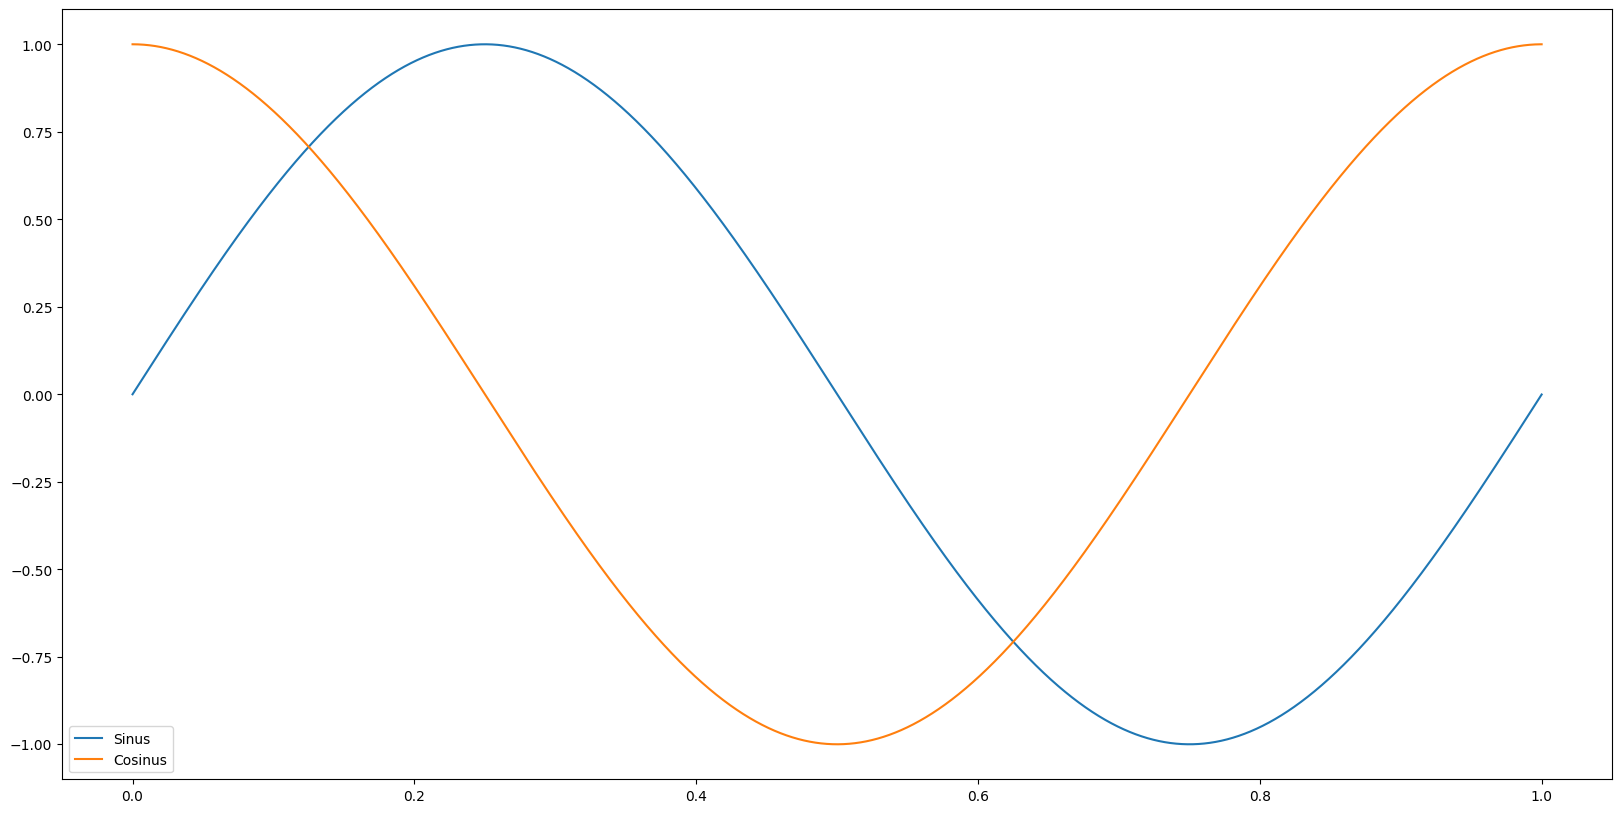

In [2]:
from math import *
import matplotlib.pyplot as plt

pts = 10000 # on calculera pts points

X=[] #X, Y1, Y2 sont des listes vides
Y1=[]
Y2=[]
val=100
for k in range(pts): # pour chaque point
    X.append(k/pts)
    Y1.append(sin(2*pi*k/pts))
    Y2.append(cos(2*pi*k/pts))

plt.figure(figsize=(20,10))
plt.plot(X,Y1,label = "Sinus")
plt.plot(X,Y2,label = "Cosinus")
plt.legend()
plt.show()


Ensuite, faites une simulation durant `T_max = 150 jours`, observez la dynamique de votre modèle. Le comportement de la simulation vous semble-t-il cohérent avec le modèle SIRD ?

#### C'est le moment de répondre à la première question du QCM (https://moodle.insa-lyon.fr/course/view.php?id=6534)

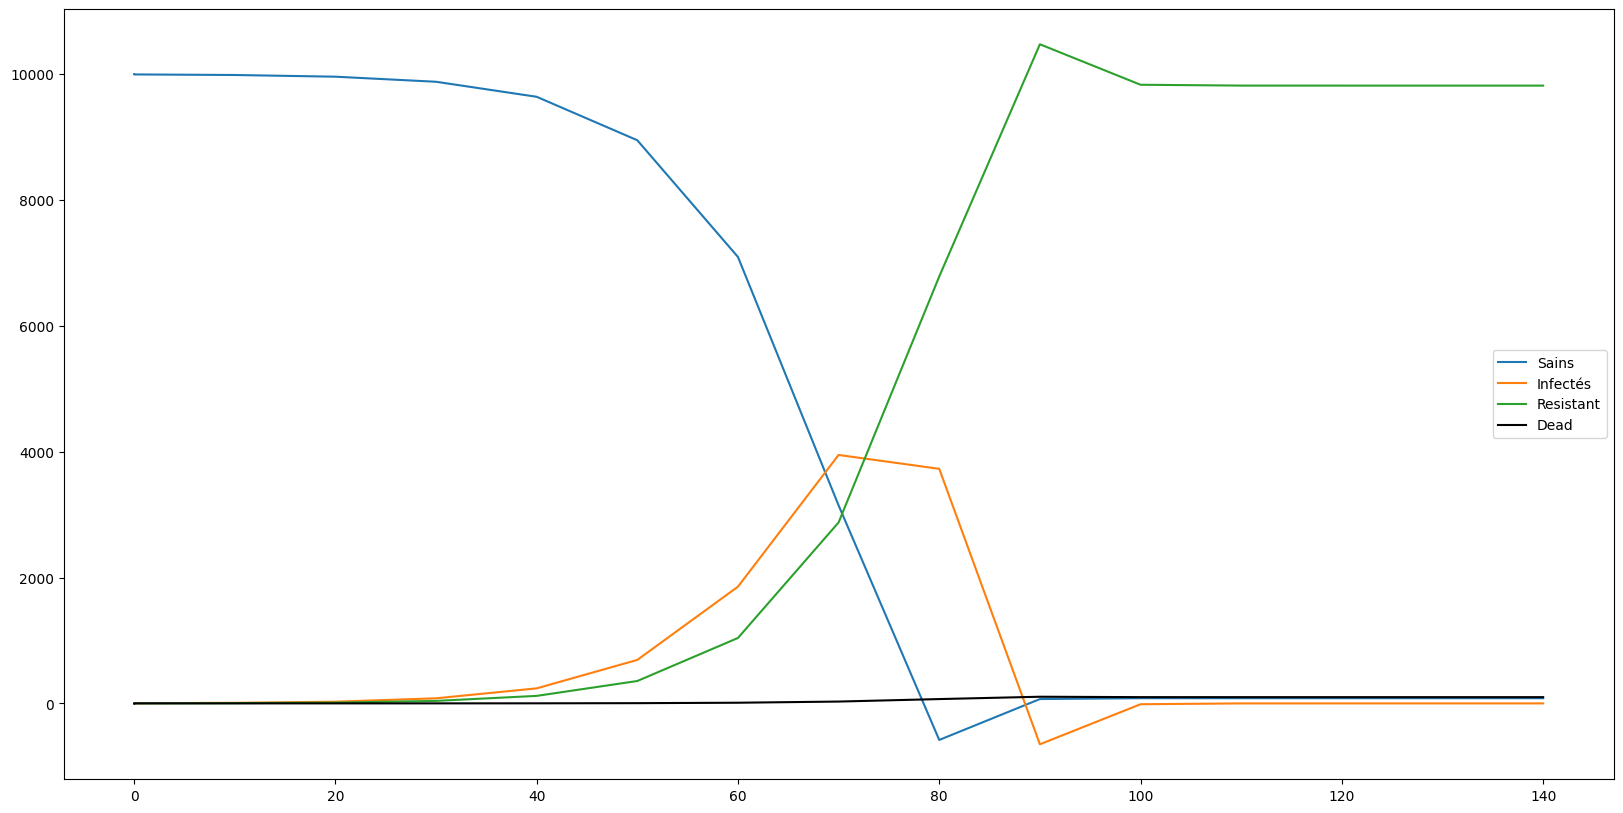

S ne diminue pas ? S0 = 10000 Smin =  -581.012153650745
I devient négatif ? -649.8294078774638
D n'augmente pas ? D0 = 0 Dmax= 105.81012153650744
R n'est pas négatif ? Rmin =  0 cependant c'est normal que R ne soit pas négatif


In [6]:
#version enseignant
tmps_malade = 10
taux_mortal = 0.01
coef_R = 3
Deltat = 10
T_max = 150

Slist,Ilist,Rlist,Dlist = calc_mort_500(tmps_malade,taux_mortal,coef_R,Deltat,T_max,True)

print("S ne diminue pas ? S0 = 10000 Smin = ",min(Slist))
print("I devient négatif ?",min(Ilist))
print("D n'augmente pas ? D0 = 0 Dmax=", max(Dlist))
print("R n'est pas négatif ? Rmin = ",min(Rlist), "cependant c'est normal que R ne soit pas négatif")

### Question 2.7 :
Maintenant mettez le pas de temps de la simulation à 1 jour; qu'est-ce que ça change et pourquoi ?

### Question 2.8 :
En laissant votre pas de temps à 1 jour et en modifiant les valeurs de $T_{malade}$, $\tau_{mortalité}$ et $R_{malade}$, observez la variation du nombre de morts à $t = 500$ et le nombre maximal de personnes dans le compartiment I durant la simulation. .

#### C'est le moment de répondre à la deuxième question du QCM (https://moodle.insa-lyon.fr/course/view.php?id=6534)

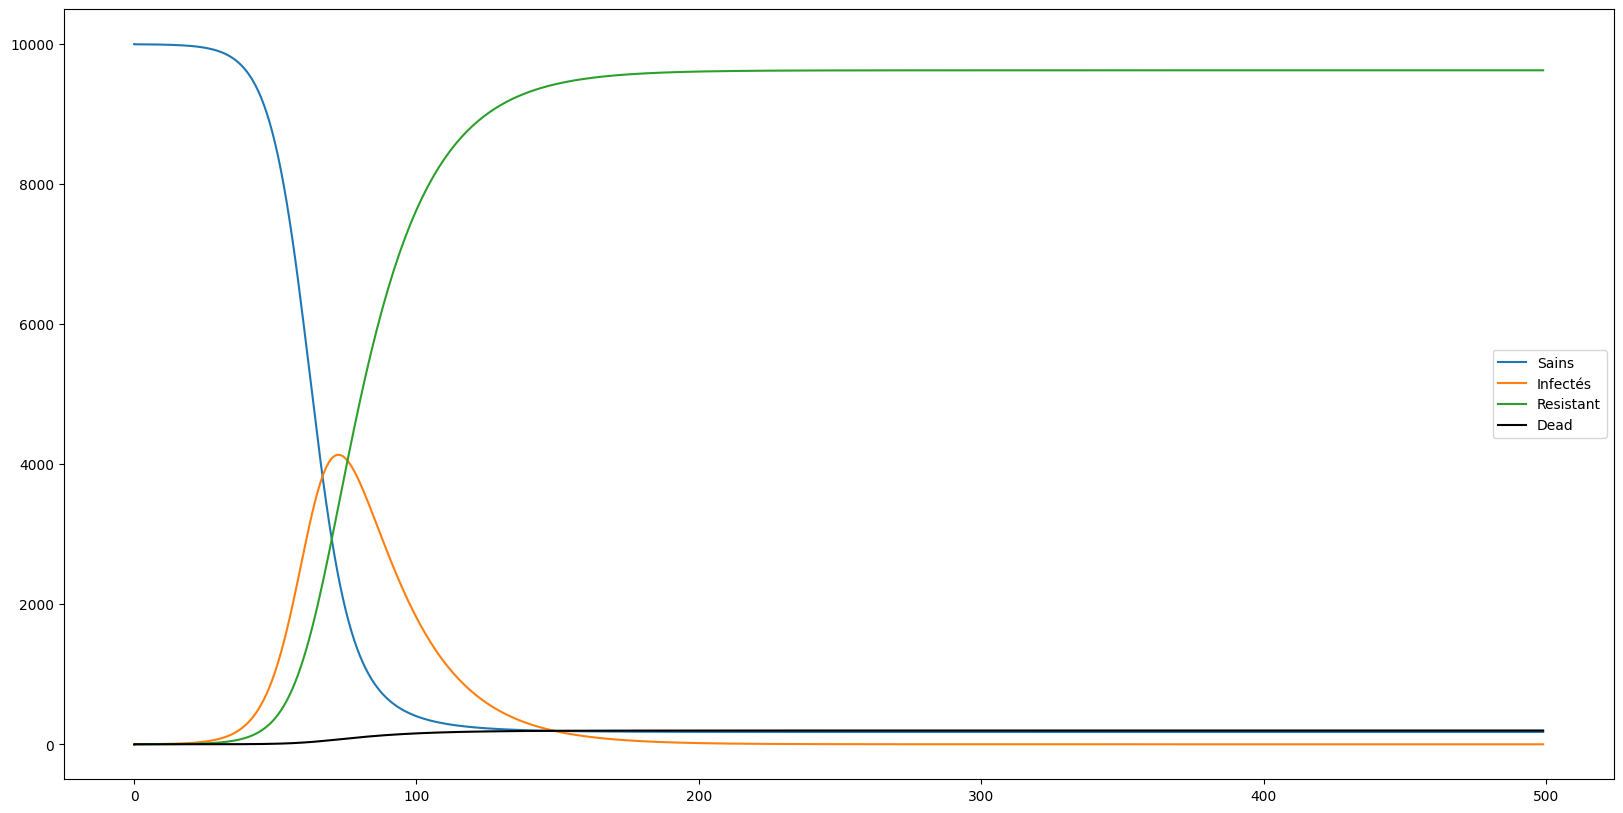

nombre de morts: 196.47759902109985 , nombre d'infectés au pic de l'épidémie: 4135.2395726390805


In [43]:
#version enseignant

tmps_malade = 20
taux_mortal = 0.02
coef_R = 4
Deltat = 1
T_max = 500

Slist,Ilist,Rlist,Dlist = calc_mort_500(tmps_malade,taux_mortal,coef_R,Deltat,T_max,True,True)
print("nombre de morts:", Dlist[-1], ", nombre d'infectés au pic de l'épidémie:",max(Ilist))

N'oubliez pas de reprendre les paramètres initiaux après la fin de la question du QCM, c'est à dire : le temps moyen de maladie est de 10 jours, le taux de mortalité est de 1% et le coefficient R est de 3.


### Question 2.9 : 
Pourquoi le nombre de personnes saines n'est-il pas nul à la fin de l'épidémie ? N'hésitez pas à demander si vous n'êtes pas sûr d'avoir compris.


## 3.  Formalisme Physique et SSA (Stochastic Simulation Algorithm).

Dans la section précédente, vous avez simulé la dynamique d'une épidémie en utilisant le modèle SIRD et la méthode d'Euler explicite. Cette méthode est relativement simple mais elle présente un défaut : elle est totalement déterministe. En d'autres termes, si vous simulez deux fois l'épidémie, vous obtiendrez exactement le même résultat. Pourtant, une "vraie" épidémie n'est pas déterministe, surtout lorsque le nombre d'individus porteurs (le compartiment I) est faible. En effet, le R0 est une valeur moyenne mais avec un R0 égal à 3, un individu porteur ne va généralement pas transmettre l'infection à exactement 3 personnes. Parfois ce sera plus, parfois ce sera moins, ce qui peut considérablement modifier la dynamique de l'épidémie (rappelez-vous les individus "super-spreaders" lors de la première vague de l'épidémie de Covid - https://www.nature.com/articles/d41586-021-00460-x). Lorsque de très nombreux individus sont porteurs, cet effet disparait car dans ce cas les disparités se compensent entre elles.

Pour pouvoir tenir compte de ce type d'effets, il va falloir changer de formalisme et adopter un formalisme issu de la physique statistique : le SSA (Stochastic Simulation Algorithm). Contrairement à Euler et aux EDO, SSA ne va pas modéliser les variations moyennes du nombre d'individus présents dans chaque compartiment, il va calculer **CHAQUE** événement de passage d'un individu d'un compartiment à un autre. En d'autres termes, SSA va calculer **QUAND** le prochain changement de compartiment va arriver (quel qu'il soit) puis il va calculer **DE QUEL** événement il s'agit. Une fois ces deux informations connues, SSA incrémente le temps (jusqu'à la date du prochain événement), change le contenu des compartiments (en fonction de l'événement qui s'est produit) et recommence le processus.

L'algorithme de SSA est donc le suivant :

`initialiser les valeurs des compartiments
 tant que le temps maximum n'est pas atteint:
    calculer la propension P_i de chaque événement possible
    calculer P, la somme de toutes les propensions P_i
    A partir de P, estimer Delta_t, le temps de survie de l'état actuel par un tirage aléatoire
    En utilisant une roulette biaisée, choisir le prochain événement et mettre à jour le contenu des compartiments
    Actualiser le temps de la simulation (t = t + Delta_t)`
    
    
    





### Question 3.1:

En suivant la démarche proposée durant la conférence introductive, donnez les équations de calcul de la propension de chacunes des réactions de la Question 1.1. Vous garderez les mêmes paramètres ($r$ pour le taux de contamination, $g$ le taux de guérison et $p$ le taux de décès) que pour le modèle précédent.


Version enseignant : 


| réaction | propensité |
| --- | --- |
|S+I → I+I | $rSI$ |  
|I → R | $gI$ |  
|I → D | $pI$ |  


### Question 3.2:
Le principe du SSA est de faire à chaque étape de la boucle `while` un tirage aléatoire du prochain évènement et de faire avancer le temps. Dans un nouveau notebook (dont vous choisirez le nom judicieusement), écrivez le programme qui réalise la boucle SSA et affichez graphiquement les valeurs de $S$, $I$, $R$ et $D$ au cours du temps (vous aurez remarqué qu'on utilise à nouveau les notations classiques car les valeurs sont à nouveau des nombres entiers : SSA calcul le nombre d'individus présents dans chaque compartiment). Pour la variable aléatoire, utilisez la fonction `random()` du package `random` qui ne prends pas d'argument et renvoie une valeur aléatoire tirée uniformément entre 0 et 1. Vous pouvez aussi utiliser la fonction `log()` du package `math`.

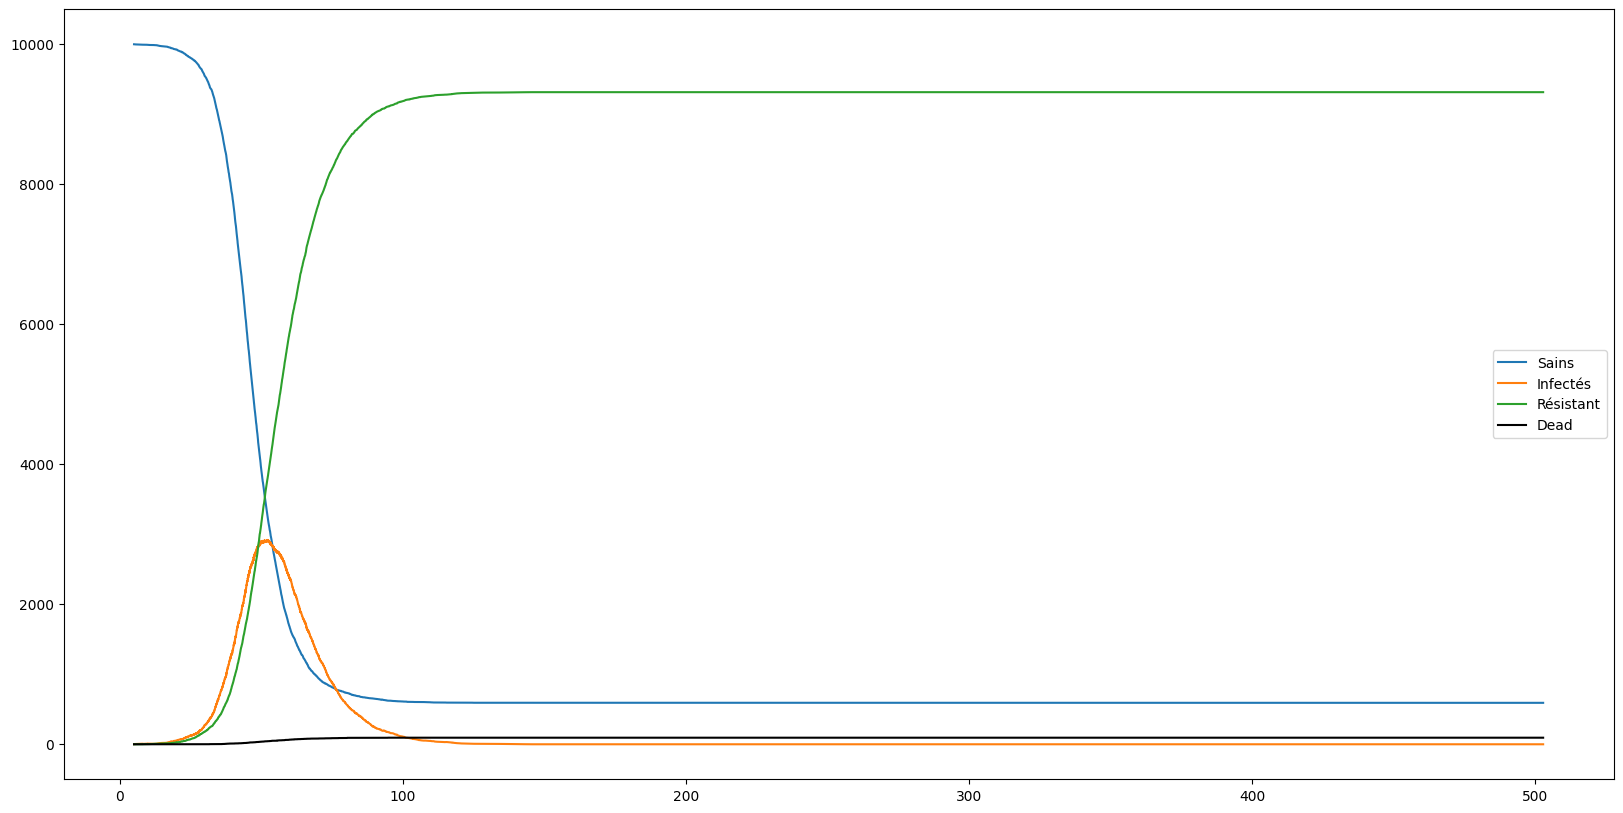

In [66]:
from random import random
from math import log
#Version enseignant

def incrdecr(B,A):
    if A >0:
        return (B+1,A-1)
    else:
        return (B,A)

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3
S_0 = 9999
I_0 = 1
R_0 = 0

r = coef_R /(S_0*tmps_malade)
p = taux_mortal/tmps_malade 
g = (1/tmps_malade) - taux_mortal/tmps_malade 
T_max = 500

t =  0 


S = S_0
I = I_0
R = R_0
D = 0

Slist = []
Ilist = []
Rlist = []
Tlist = []
Dlist = []

while t<= T_max:
    
    prop_SIII = r*S*I
    prop_IR = g*I
    prop_ID = p*I
    
    prop_tot = prop_SIII + prop_IR + prop_ID
    if prop_tot!=0:
        delta_t = -log(random())/prop_tot
    else:
        t = T_max
    t = t +delta_t
    
    
    rand = random()
    Cprop = prop_tot * rand
    
    if Cprop < prop_SIII : 
        I,S = incrdecr(I,S)
    elif Cprop < prop_SIII + prop_IR :
        R,I = incrdecr(R,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID :
        D,I = incrdecr(D,I)
    
    Slist.append(S)
    Ilist.append(I)
    Rlist.append(R)
    Dlist.append(D)
    Tlist.append(t)  

plt.figure(figsize=(20,10))
plt.plot(Tlist,Slist,label = "Sains")
plt.plot(Tlist,Ilist,label = "Infectés")
plt.plot(Tlist,Rlist,label = "Résistant")
plt.plot(Tlist,Dlist,'k',label = "Dead")
plt.legend()
plt.show()

### Question 3.3 :

Relancez le modèle SSA plusieurs fois, est ce que vous remarquez des différences de comportement ? Si oui, pourquoi ?

#### C'est le moment de répondre à la troisième question du QCM (https://moodle.insa-lyon.fr/course/view.php?id=6534)

### Question 3.4 :

Comparer les résultats obtenus par le modèle SSA et par le modèle ODE. Selon vous laquelle des deux implémentations (ODE vs SSA) du modèle SIRD est la plus proche de la réalité, est-elle la plus pertinente ? 

## 4 Modification du modèle

Nous avons ici simulé un modèle SIRD classique avec deux méthodes. Cependant il faut savoir que de nombreux autres paramètres ou compartiments peuvent faire partie du modèle. Pour la suite, nous allons modifier l'implémentation SSA. Pour chacune de ces modifications, vous crérez un nouveau notebook dont vous veillerez à gérer le versionnement.

Pour chaque nouvelle variante, n'hésitez pas si besoin à refaire le schéma et/ou les équations de réactions pour bien comprendre.

### Question 4.1 : Immunité temporaire

Rajoutez un nouveau lien dans votre modèle qui ira du comportement R des personnes gueries ("Recovered") au comportement S des personnes "Susceptibles" pour modéliser la perte d'immunité. Vous modéliserez la perte d'immunité comme les autres transitions, pour le paramètre, dites vous que un individu reste en moyenne immunisé environ 240 jours. Pour une meilleure visibilité du phénomène, vous pouvez essayer de prolonger la simulation au dela de $t = 500$.

#### C'est le moment de répondre à la quatrième question du QCM (https://moodle.insa-lyon.fr/course/view.php?id=6534)


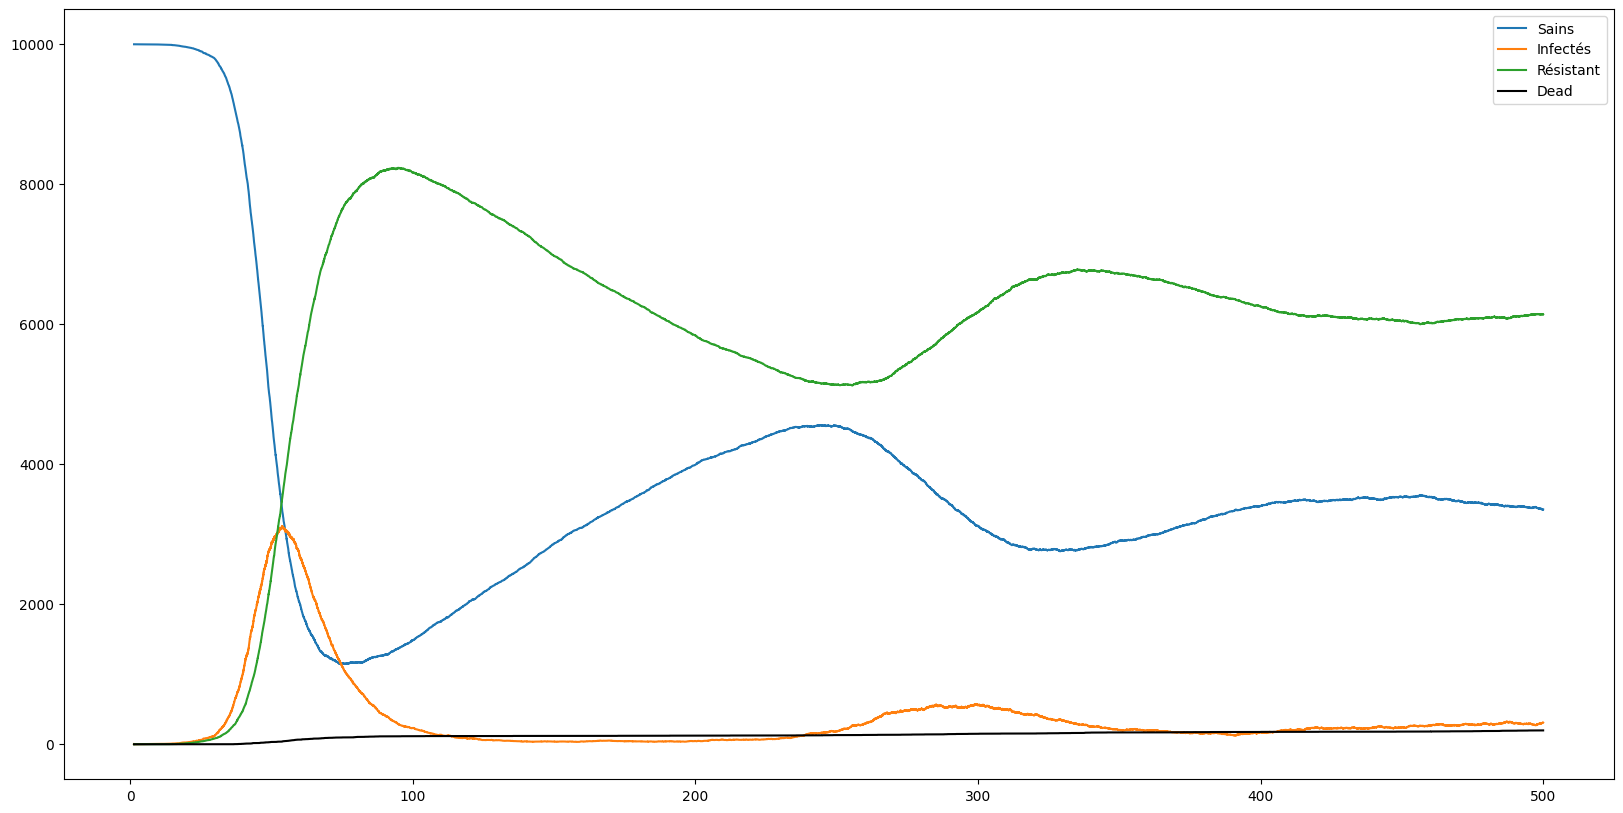

In [93]:
from random import random
from math import log
#Version enseignant

def incrdecr(B,A):
    if A >0:
        return (B+1,A-1)
    else:
        return (B,A)

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3

immu = 1/240

r = coef_R /(S_0*tmps_malade)
p = taux_mortal/tmps_malade 
g = (1/tmps_malade) - taux_mortal/tmps_malade 
T_max = 500

t =  0 

S = S_0
I = I_0
R = R_0
D = 0

Slist = []
Ilist = []
Rlist = []
Tlist = []
Dlist = []

while t<= T_max:
    
    prop_SIII = r*S*I
    prop_IR = g*I
    prop_ID = p*I
    prop_RS = immu*R
    
    prop_tot = prop_SIII + prop_IR + prop_ID + prop_RS
    if prop_tot!=0:
        delta_t = -log(random())/prop_tot
    else:
        t = T_max
    t = t +delta_t

    
    rand = random()
    Cprop = prop_tot * rand
    
    if Cprop < prop_SIII : 
        I,S = incrdecr(I,S)
    elif Cprop < prop_SIII + prop_IR :
        R,I = incrdecr(R,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID :
        D,I = incrdecr(D,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RS:
        S,R = incrdecr(S,R)
    
    Slist.append(S)
    Ilist.append(I)
    Rlist.append(R)
    Dlist.append(D)
    Tlist.append(t)  

plt.figure(figsize=(20,10))
plt.plot(Tlist,Slist,label = "Sains")
plt.plot(Tlist,Ilist,label = "Infectés")
plt.plot(Tlist,Rlist,label = "Résistant")
plt.plot(Tlist,Dlist,'k',label = "Dead")
plt.legend()
plt.show()

### Question 4.2: Variant

En plus de l'immunité temporaire, la population commence avec 99 personnes infectées par le virus initial et 1 personne infectée avec un variant (compartiment "V") dont le taux d'infection en moyenne est $R_{V} = 4$ personnes, les taux de mortalité et de guérisons restent les mêmes et la période d'immunité (compartiment 'R') est la même pouir les deux variants. Simulez la situation dans une nouvelle version et observez les résultats. Que se passe-t-il, pourquoi ? Est ce que le variant fini toujours par prendre le dessus sur le virus initial ?


#### C'est le moment de répondre à la cinquième question du QCM (https://moodle.insa-lyon.fr/course/view.php?id=6534)


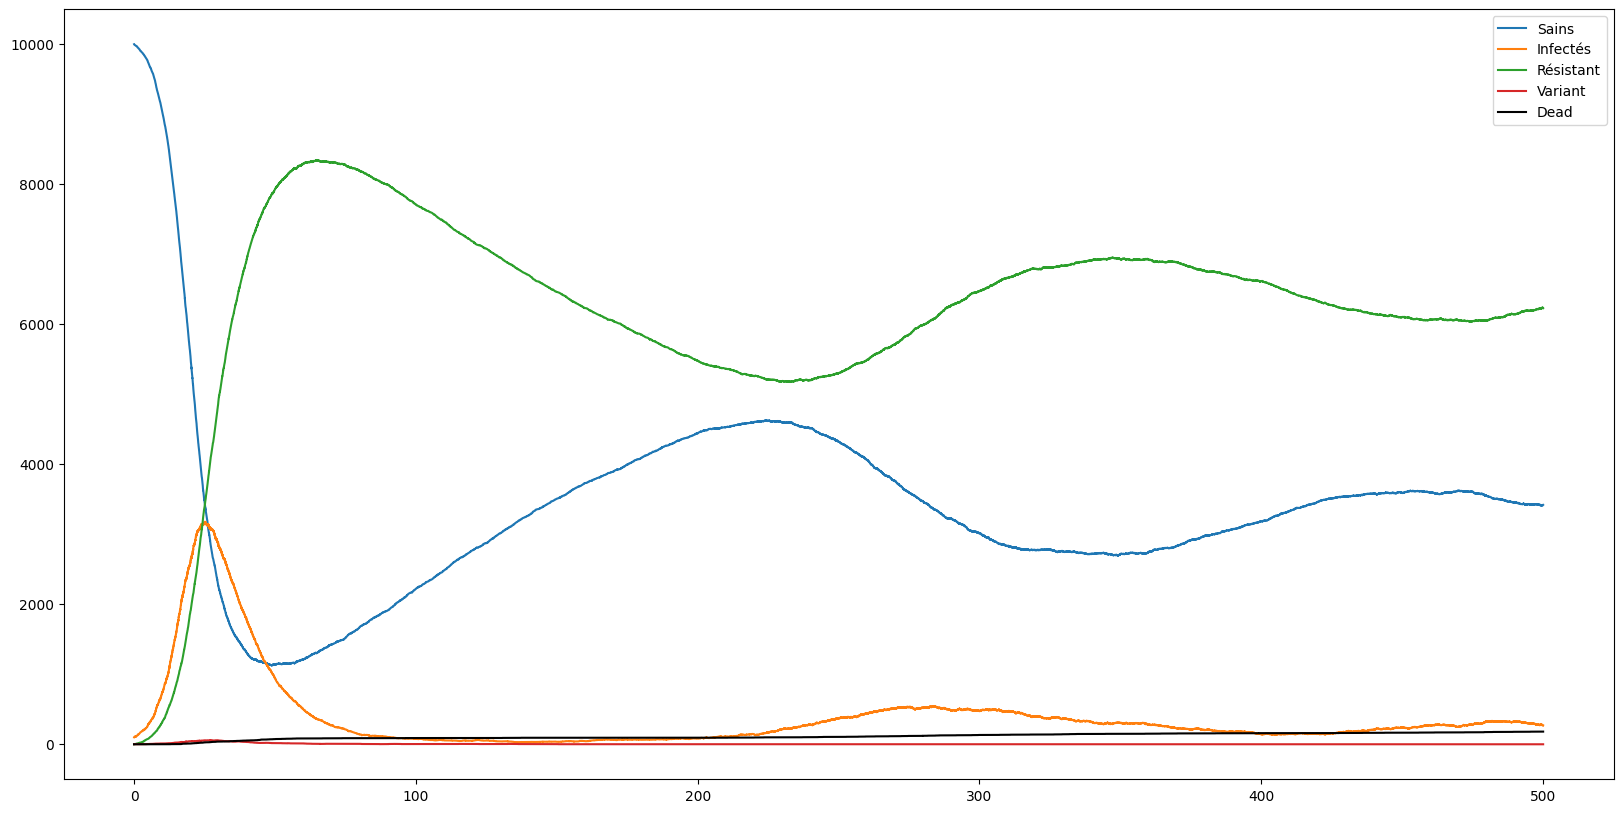

In [100]:
from random import random
from math import log
#Version enseignant

def incrdecr(B,A):
    if A >0:
        return (B+1,A-1)
    else:
        return (B,A)

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3
coef_Rv = 4

immu = 1/240

r = coef_R /(S_0*tmps_malade)
rv = coef_Rv /(S_0*tmps_malade)
p = taux_mortal/tmps_malade 
g = (1/tmps_malade) - taux_mortal/tmps_malade 
T_max = 500

t =  0 

S = S_0
I = 99 # et non plus I_0
R = R_0
V = 1 # V_0
D = 0

Slist = []
Ilist = []
Rlist = []
Tlist = []
Vlist = []
Dlist = []

while t<= T_max:
    
    prop_SIII = r*S*I
    prop_IR = g*I
    prop_ID = p*I
    prop_RS = immu*R
    prop_SVVV = rv*S*V
    prop_VR = g * V
    prop_VD = p*V
    
    prop_tot = prop_SIII + prop_IR + prop_ID + prop_RS + prop_SVVV + prop_VR + prop_VD
    
    if prop_tot!=0:
        delta_t = -log(random())/prop_tot
    else:
        t = T_max

    t = t +delta_t

    
    rand = random()
    Cprop = prop_tot * rand
    
    if Cprop < prop_SIII : 
        I,S = incrdecr(I,S)
    elif Cprop < prop_SIII + prop_IR :
        R,I = incrdecr(R,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID :
        D,I = incrdecr(D,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RS:
        S,R = incrdecr(S,R)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RS + prop_SVVV:
        V,S = incrdecr(V,S)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RS + prop_SVVV + prop_VR:
        R,V = incrdecr(R,V)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RS + prop_SVVV + prop_VR + prop_VD:
        D,V = incrdecr(D,V)
    
    Slist.append(S)
    Ilist.append(I)
    Rlist.append(R)
    Dlist.append(D)
    Vlist.append(V)
    Tlist.append(t)  

plt.figure(figsize=(20,10))
plt.plot(Tlist,Slist,label = "Sains")
plt.plot(Tlist,Ilist,label = "Infectés")
plt.plot(Tlist,Rlist,label = "Résistant")
plt.plot(Tlist,Vlist,label = "Variant")
plt.plot(Tlist,Dlist,'k',label = "Dead")
plt.legend()
plt.show()

### Question 4.3 : Politique publique

Choisissez une des modifications suivantes que vous ajouterez au modèle sans variant. Ces modifications peuvent être un peu différentes du modèle à compartiment "classique".

- Lorsque le nombre de malades (personnes "Infectées") atteint 5% de la population initiale, le gouvernement prend des mesures de confinement qui réduisent de moitié le coefficient $R_{malade}$ de la transmission de la maladie. Ce coefficient reprend sa valeur initiale lorsque le nombre de malades passe en dessous de 1% de la population initiale.

- Un vaccin est découvert à partir du 40ème jour (lorsque $t >= 40$). Les personnes Saines ont une chance sur 240 par jour de se faire vacciner et donc de passer directement de Saines à Résistantes. On estimera que la durée de la résistance due au vaccin est similaire à celle due à la maladie.

- Le traçage et la prise en charge des malades sont améliorés : un malade peut être mis en quarantaine (compartiment "Q") avec une chance sur dix. Un malade en quarantaine infecte en moyenne $R_{Q} = 1$ personne. 

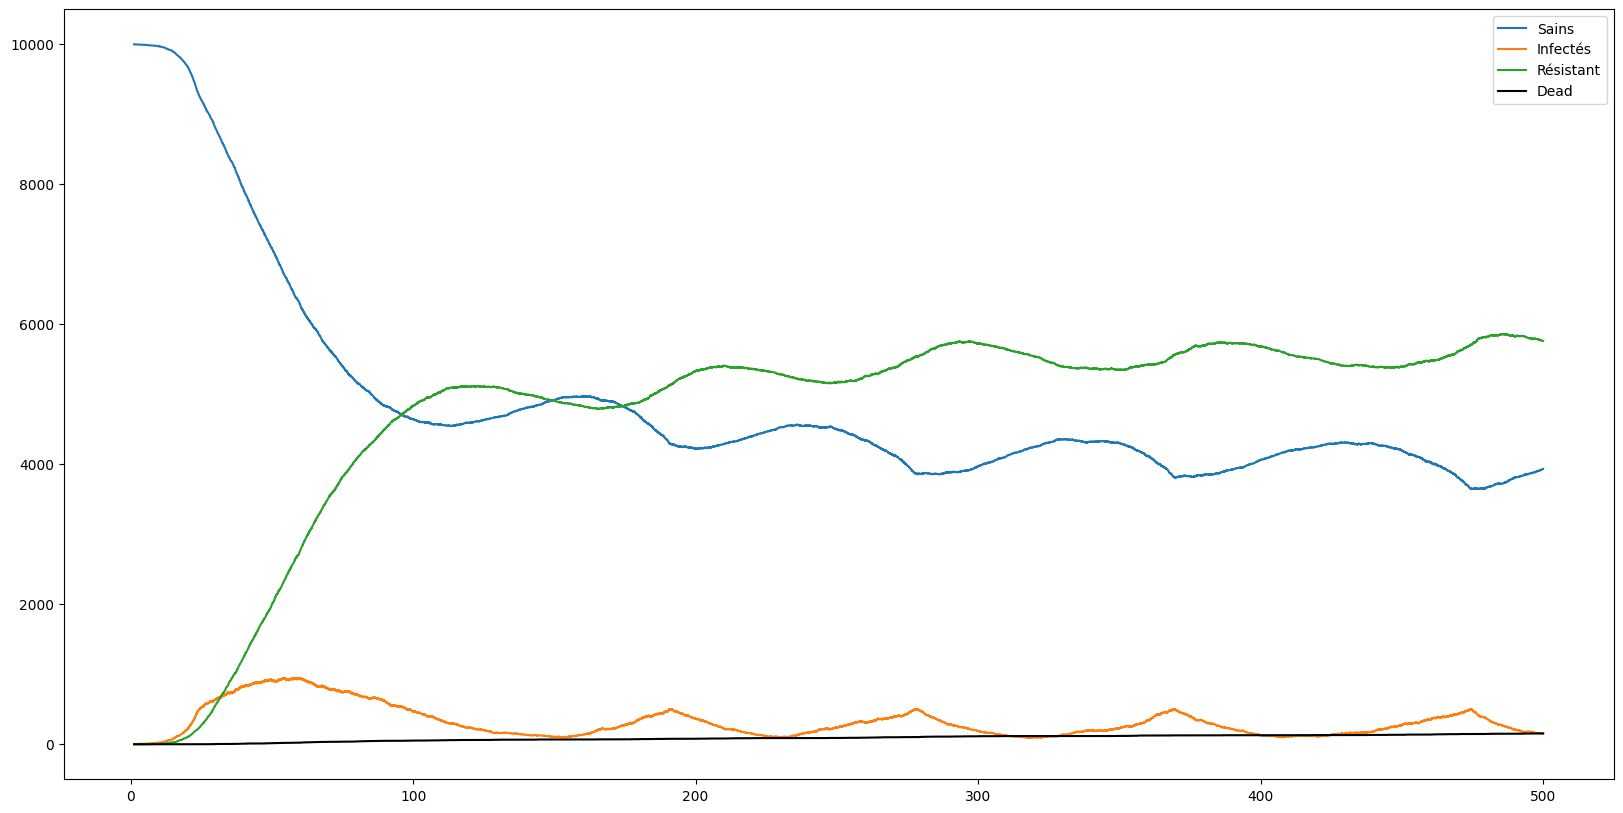

In [119]:
from random import random
from math import log

#Version enseignant confinement

def incrdecr(B,A):
    if A >0:
        return (B+1,A-1)
    else:
        return (B,A)

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3
immu = 1/240

r = coef_R /(S_0*tmps_malade)
p = taux_mortal/tmps_malade 
g = (1/tmps_malade) - taux_mortal/tmps_malade 
T_max = 500

t =  0 

Tot = S_0+I_0+R_0
S = S_0
I = I_0
R = R_0
D = 0

Slist = []
Ilist = []
Rlist = []
Tlist = []
Dlist = []

while t<= T_max:
    
    if I >= Tot*0.05:
        r = coef_R /(2*S_0*tmps_malade)
    elif I <= Tot*0.01:
        r = coef_R /(S_0*tmps_malade)

    prop_SIII = r*S*I
    prop_IR = g*I
    prop_ID = p*I
    prop_RI = immu*R
    
    prop_tot = prop_SIII + prop_IR + prop_ID + prop_RI
    if prop_tot!=0:
        delta_t = -log(random())/prop_tot
    else:
        t = T_max
    t = t +delta_t
    
    
    rand = random()
    Cprop = prop_tot * rand
    
    if Cprop < prop_SIII : 
        I,S = incrdecr(I,S)
    elif Cprop < prop_SIII + prop_IR :
        R,I = incrdecr(R,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID :
        D,I = incrdecr(D,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI:
        S,R = incrdecr(S,R)
    
    Slist.append(S)
    Ilist.append(I)
    Rlist.append(R)
    Dlist.append(D)
    Tlist.append(t)  

plt.figure(figsize=(20,10))
plt.plot(Tlist,Slist,label = "Sains")
plt.plot(Tlist,Ilist,label = "Infectés")
plt.plot(Tlist,Rlist,label = "Résistant")
plt.plot(Tlist,Dlist,'k',label = "Dead")
plt.legend()
plt.show()

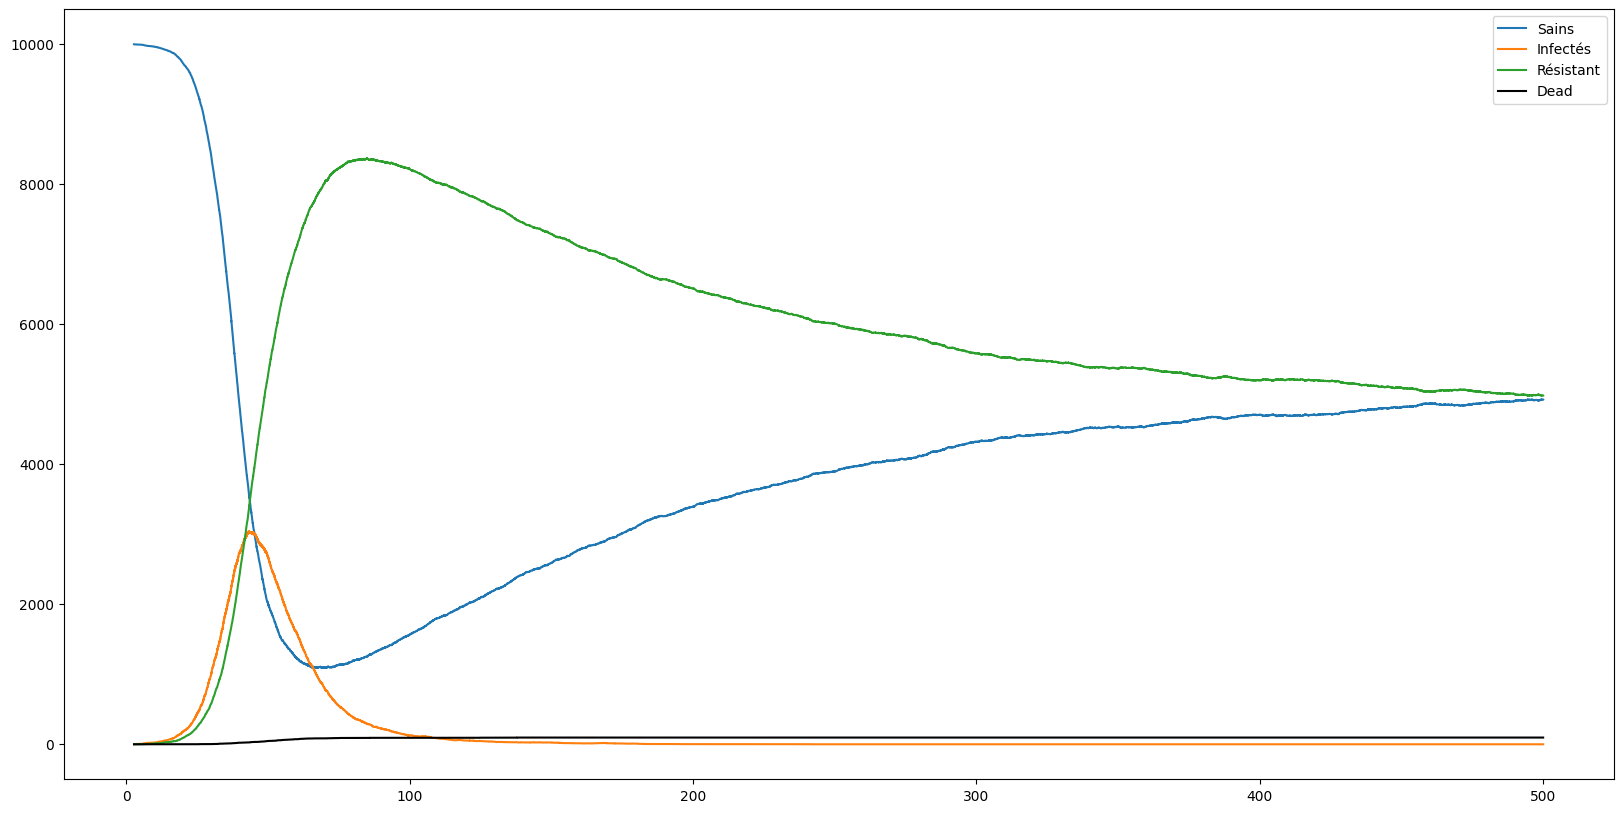

In [158]:
from random import random
from math import log

#Version enseignant vaccin

def incrdecr(B,A):
    if A >0:
        return (B+1,A-1)
    else:
        return (B,A)

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3
immu = 1/240
r = coef_R /(S_0*tmps_malade)
p = taux_mortal/tmps_malade 
g = (1/tmps_malade) - taux_mortal/tmps_malade 
T_max = 500
taux_vaccin =1/240

t =  0 

S = S_0
I = I_0
R = R_0
D = 0

Slist = []
Ilist = []
Rlist = []
Tlist = []
Dlist = []

vaccin = False

while t<= T_max:
    
    prop_SIII = r*S*I
    prop_IR = g*I
    prop_ID = p*I
    prop_RI = immu*R
    
    if t >= 40:
        vaccin = True
        
    prop_SR = vaccin*S*taux_vaccin
    
    prop_tot = prop_SIII + prop_IR + prop_ID + prop_RI+prop_SR
    if prop_tot!=0:
        delta_t = -log(random())/prop_tot
    else:
        t = T_max
    t = t +delta_t

    
    rand = random()
    Cprop = prop_tot * rand
    
    if Cprop < prop_SIII : 
        I,S = incrdecr(I,S)
    elif Cprop < prop_SIII + prop_IR :
        R,I = incrdecr(R,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID :
        D,I = incrdecr(D,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI:
        S,R = incrdecr(S,R)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI + prop_SR:
        R,S = incrdecr(R,S)
    
    Slist.append(S)
    Ilist.append(I)
    Rlist.append(R)
    Dlist.append(D)
    Tlist.append(t)  

plt.figure(figsize=(20,10))
plt.plot(Tlist,Slist,label = "Sains")
plt.plot(Tlist,Ilist,label = "Infectés")
plt.plot(Tlist,Rlist,label = "Résistant")
plt.plot(Tlist,Dlist,'k',label = "Dead")
plt.legend()
plt.show()

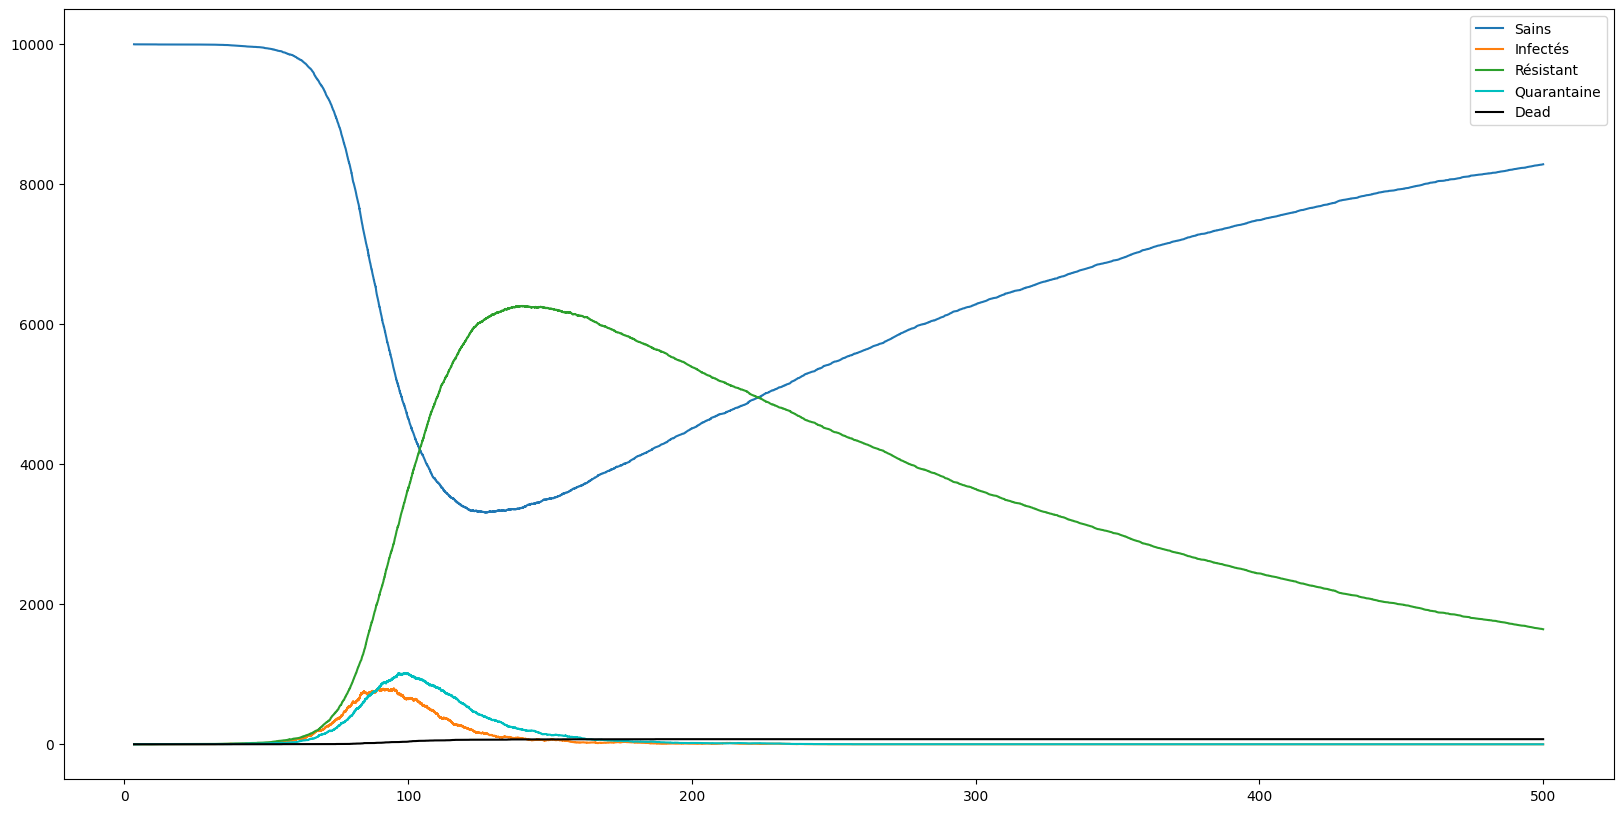

In [183]:
from random import random
from math import log

#Version enseignant quarantaine

def incrdecr(B,A):
    if A >0:
        return (B+1,A-1)
    else:
        return (B,A)

tmps_malade = 10
taux_mortal = 0.01
coef_R = 3

immu = 1/240

r = coef_R /(S_0*tmps_malade)
p = taux_mortal/tmps_malade 
g = (1/tmps_malade) - taux_mortal/tmps_malade 
T_max = 500
rQ = 1 /(S_0*tmps_malade)

t =  0 

S = S_0
I = I_0
R = R_0
D = 0
Q = 0

Slist = []
Ilist = []
Rlist = []
Tlist = []
Dlist = []
Qlist = []

while t<= T_max:
    
    prop_SIII = r*S*I
    prop_IR = g*I
    prop_ID = p*I
    prop_RI = immu*R
    prop_IQ = I/7
    prop_QR = g*Q
    prop_SIQI = rQ*Q*S
    prop_QD = p*Q
    
    prop_tot = prop_SIII + prop_IR + prop_ID + prop_RI + prop_IQ + prop_QR + prop_SIQI +prop_QD 
    
    if prop_tot!=0:
        delta_t = -log(random())/prop_tot
    else:
        t = T_max
    t = t +delta_t

    
    rand = random()
    Cprop = prop_tot * rand
    
    if Cprop < prop_SIII : 
        I,S = incrdecr(I,S)
    elif Cprop < prop_SIII + prop_IR :
        R,I = incrdecr(R,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID :
        D,I = incrdecr(D,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI:
        S,R = incrdecr(S,R)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI + prop_IQ:
        Q,I = incrdecr(Q,I)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI + prop_IQ + prop_QR:
        R,Q = incrdecr(R,Q)
    elif Cprop < prop_SIII + prop_IR + prop_ID + prop_RI + prop_IQ + prop_QR + prop_SIQI:
        I,S = incrdecr(I,S)
    else :
        D,Q = incrdecr(D,Q)
    
    
    Slist.append(S)
    Ilist.append(I)
    Rlist.append(R)
    Dlist.append(D)
    Qlist.append(Q)
    Tlist.append(t)  

plt.figure(figsize=(20,10))
plt.plot(Tlist,Slist,label = "Sains")
plt.plot(Tlist,Ilist,label = "Infectés")
plt.plot(Tlist,Rlist,label = "Résistant")
plt.plot(Tlist,Qlist,'c',label = "Quarantaine")
plt.plot(Tlist,Dlist,'k',label = "Dead")
plt.legend()
plt.show()

### Question 4.4: Pour aller plus loin

Pour cette question, il peut être utile de faire une nouvelle version dans laquelle vous ferez une fonction qui effectuera la simulation avec les paramètres de votre choix et renvera les listes du nombre d'individus dans chaque compartiment à chaque pas de temps.

Parmi les trois politiques publiques ci-dessus, laquelle est la meilleure pour diminuer la hauteur du pic de la première vague ? Pour ralentir la progession du variant ($I = 0$) ? Pour diminuer le nombre de décès durant les 1000 premiers jours ?

## Conclusion

Vous savez maintenant modéliser des modèles compartimentaux et ce, de deux façons différentes (ODE-Euler, modèle événementiel-SSA). Les modèles compartimentaux sont très utilisés en biologie et en écologie. Ils permettent de modéliser les cinétiques chimiques, les échanges moléculaires entre les cellules, la diffusion des médicaments, les systèmes proies-prédateurs et, bien évidemment, les épidémies, ... (et ils sont utilisés dans bien d'autres domaines !). Si vous le souhaitez, vous pouvez maintenant jouer un peu avec ces modèles, par exemple en simulant des interactions écologiques proies-prédateurs plus ou moins complexes et même comparer les résultats avec une simulation ODE ou avec une simulation SSA. D'ailleurs, posez-vous la question suivante : quand une population est proche de l'extinction, vaut-il mieux utiliser SSA ou ODE-Euler pour simuler sa dynamique ? ... Bref, à vous de jouer !